In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
#Create a connection from Python to SQL
cnxn=pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                   "Server=LAPTOP-30RPIOSN;"
                   "database=AdventureWorksDW2014;"
                   "Trusted_Connection=yes;")

In [3]:
factinternet=pd.read_sql_query("""SELECT
[CustomerKey]
,[OrderQuantity]
,[SalesOrderNumber]
,[SalesAmount]
,[OrderDate]
,[SalesTerritoryKey]
FROM [dbo].[FactInternetSales]""",cnxn)

In [4]:
factinternet.head()

,CustomerKey,OrderQuantity,SalesOrderNumber,SalesAmount,OrderDate,SalesTerritoryKey
0,21768,1,SO43697,3578.2700,2010-12-29,6
1,28389,1,SO43698,3399.9900,2010-12-29,7
2,25863,1,SO43699,3399.9900,2010-12-29,1
3,14501,1,SO43700,699.0982,2010-12-29,4
4,11003,1,SO43701,3399.9900,2010-12-29,9


In [5]:
factinternet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 6 columns):
CustomerKey          60398 non-null int64
OrderQuantity        60398 non-null int64
SalesOrderNumber     60398 non-null object
SalesAmount          60398 non-null float64
OrderDate            60398 non-null datetime64[ns]
SalesTerritoryKey    60398 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 2.8+ MB


In [6]:
#import customer table
customers=pd.read_sql_query("""select
[CustomerKey]
,[BirthDate]
,[MaritalStatus]
,[Gender]
,[YearlyIncome]
,[TotalChildren]
,[NumberChildrenAtHome]
,[EnglishEducation]
,[EnglishOccupation]
,[HouseOwnerFlag]
,[NumberCarsOwned]
,[DateFirstPurchase]
,[CommuteDistance]
FROM [dbo].[DimCustomer]""",cnxn)

In [7]:
customers.head()

,CustomerKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance
0,11000,1971-10-06,M,M,90000.0,2,0,Bachelors,Professional,1,0,2011-01-19,1-2 Miles
1,11001,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles
2,11002,1971-02-09,M,M,60000.0,3,3,Bachelors,Professional,1,1,2011-01-07,2-5 Miles
3,11003,1973-08-14,S,F,70000.0,0,0,Bachelors,Professional,0,1,2010-12-29,5-10 Miles
4,11004,1979-08-05,S,F,80000.0,5,5,Bachelors,Professional,1,4,2011-01-23,1-2 Miles


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 13 columns):
CustomerKey             18484 non-null int64
BirthDate               18484 non-null object
MaritalStatus           18484 non-null object
Gender                  18484 non-null object
YearlyIncome            18484 non-null float64
TotalChildren           18484 non-null int64
NumberChildrenAtHome    18484 non-null int64
EnglishEducation        18484 non-null object
EnglishOccupation       18484 non-null object
HouseOwnerFlag          18484 non-null object
NumberCarsOwned         18484 non-null int64
DateFirstPurchase       18484 non-null object
CommuteDistance         18484 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 1.8+ MB


In [9]:
#Import Factinternetsalesreason
factinsalesreason = pd.read_sql_query("""
SELECT *
FROM [dbo].[FactInternetSalesReason]""", cnxn)

In [10]:
factinsalesreason.head()

,SalesOrderNumber,SalesOrderLineNumber,SalesReasonKey
0,SO43697,1,5
1,SO43697,1,9
2,SO43702,1,5
3,SO43702,1,9
4,SO43703,1,5


In [11]:
factinsalesreason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64515 entries, 0 to 64514
Data columns (total 3 columns):
SalesOrderNumber        64515 non-null object
SalesOrderLineNumber    64515 non-null int64
SalesReasonKey          64515 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [12]:
#Import salesreason
salesreason = pd.read_sql_query("""
SELECT *
FROM [dbo].[DimSalesReason]""", cnxn)

In [13]:
salesreason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
SalesReasonKey             10 non-null int64
SalesReasonAlternateKey    10 non-null int64
SalesReasonName            10 non-null object
SalesReasonReasonType      10 non-null object
dtypes: int64(2), object(2)
memory usage: 400.0+ bytes


In [14]:
salesreason.head()

,SalesReasonKey,SalesReasonAlternateKey,SalesReasonName,SalesReasonReasonType
0,1,1,Price,Other
1,2,2,On Promotion,Promotion
2,3,3,Magazine Advertisement,Marketing
3,4,4,Television Advertisement,Marketing
4,5,5,Manufacturer,Other


In [15]:
factinternet_agg=factinternet.groupby('CustomerKey').agg({'OrderQuantity':['sum','min','max','mean','median'],'SalesAmount':['sum','min','max','mean','median'],
                                                         'OrderDate':['max']})

In [16]:
factinternet_agg.head()

OrderQuantity                     SalesAmount                  \
                      sum min max mean median         sum    min      max   
CustomerKey                                                                 
11000                   8   1   1    1      1     8248.99   4.99  3399.99   
11001                  11   1   1    1      1     6383.88   4.99  3374.99   
11002                   4   1   1    1      1     8114.04  34.99  3399.99   
11003                   9   1   1    1      1     8139.29   2.29  3399.99   
11004                   6   1   1    1      1     8196.01  21.98  3399.99   

                                   OrderDate  
                    mean   median        max  
CustomerKey                                   
11000        1031.123750    44.49 2013-05-03  
11001         580.352727    21.98 2013-12-10  
11002        2028.510000  2339.53 2013-02-23  
11003         904.365556     9.99 2013-05-10  
11004        1366.001667  1177.49 2013-05-01

In [17]:
#Join the field names to the newly aggregate fields names
factinternet_agg.columns=['_'.join(factinternet_agg) for factinternet_agg in factinternet_agg.columns.ravel()]

In [18]:
#reset index
factinternet_agg=factinternet_agg.reset_index()

In [19]:
factinternet_agg.head()

,CustomerKey,OrderQuantity_sum,OrderQuantity_min,OrderQuantity_max,OrderQuantity_mean,OrderQuantity_median,SalesAmount_sum,SalesAmount_min,SalesAmount_max,SalesAmount_mean,SalesAmount_median,OrderDate_max
0,11000,8,1,1,1,1,8248.99,4.99,3399.99,1031.123750,44.49,2013-05-03
1,11001,11,1,1,1,1,6383.88,4.99,3374.99,580.352727,21.98,2013-12-10
2,11002,4,1,1,1,1,8114.04,34.99,3399.99,2028.510000,2339.53,2013-02-23
3,11003,9,1,1,1,1,8139.29,2.29,3399.99,904.365556,9.99,2013-05-10
4,11004,6,1,1,1,1,8196.01,21.98,3399.99,1366.001667,1177.49,2013-05-01


In [20]:
factinternet_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 12 columns):
CustomerKey             18484 non-null int64
OrderQuantity_sum       18484 non-null int64
OrderQuantity_min       18484 non-null int64
OrderQuantity_max       18484 non-null int64
OrderQuantity_mean      18484 non-null int64
OrderQuantity_median    18484 non-null int64
SalesAmount_sum         18484 non-null float64
SalesAmount_min         18484 non-null float64
SalesAmount_max         18484 non-null float64
SalesAmount_mean        18484 non-null float64
SalesAmount_median      18484 non-null float64
OrderDate_max           18484 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 1.7 MB


In [21]:
#Merging the aggregated field with customer table
customer_sale=pd.merge(customers,factinternet_agg, on= 'CustomerKey')

In [22]:
customer_sale.head()

,CustomerKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,...,OrderQuantity_min,OrderQuantity_max,OrderQuantity_mean,OrderQuantity_median,SalesAmount_sum,SalesAmount_min,SalesAmount_max,SalesAmount_mean,SalesAmount_median,OrderDate_max
0,11000,1971-10-06,M,M,90000.0,2,0,Bachelors,Professional,1,...,1,1,1,1,8248.99,4.99,3399.99,1031.123750,44.49,2013-05-03
1,11001,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,...,1,1,1,1,6383.88,4.99,3374.99,580.352727,21.98,2013-12-10
2,11002,1971-02-09,M,M,60000.0,3,3,Bachelors,Professional,1,...,1,1,1,1,8114.04,34.99,3399.99,2028.510000,2339.53,2013-02-23
3,11003,1973-08-14,S,F,70000.0,0,0,Bachelors,Professional,0,...,1,1,1,1,8139.29,2.29,3399.99,904.365556,9.99,2013-05-10
4,11004,1979-08-05,S,F,80000.0,5,5,Bachelors,Professional,1,...,1,1,1,1,8196.01,21.98,3399.99,1366.001667,1177.49,2013-05-01


In [23]:
customer_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 24 columns):
CustomerKey             18484 non-null int64
BirthDate               18484 non-null object
MaritalStatus           18484 non-null object
Gender                  18484 non-null object
YearlyIncome            18484 non-null float64
TotalChildren           18484 non-null int64
NumberChildrenAtHome    18484 non-null int64
EnglishEducation        18484 non-null object
EnglishOccupation       18484 non-null object
HouseOwnerFlag          18484 non-null object
NumberCarsOwned         18484 non-null int64
DateFirstPurchase       18484 non-null object
CommuteDistance         18484 non-null object
OrderQuantity_sum       18484 non-null int64
OrderQuantity_min       18484 non-null int64
OrderQuantity_max       18484 non-null int64
OrderQuantity_mean      18484 non-null int64
OrderQuantity_median    18484 non-null int64
SalesAmount_sum         18484 non-null float64
SalesAmount_min         

In [24]:
#prepare the salesreason data
sales_reason=pd.merge(factinsalesreason,salesreason, on='SalesReasonKey', how='left')

In [25]:
sales_reason.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64515 entries, 0 to 64514
Data columns (total 6 columns):
SalesOrderNumber           64515 non-null object
SalesOrderLineNumber       64515 non-null int64
SalesReasonKey             64515 non-null int64
SalesReasonAlternateKey    64515 non-null int64
SalesReasonName            64515 non-null object
SalesReasonReasonType      64515 non-null object
dtypes: int64(3), object(3)
memory usage: 3.4+ MB


In [26]:
sales_reason.head()

,SalesOrderNumber,SalesOrderLineNumber,SalesReasonKey,SalesReasonAlternateKey,SalesReasonName,SalesReasonReasonType
0,SO43697,1,5,5,Manufacturer,Other
1,SO43697,1,9,9,Quality,Other
2,SO43702,1,5,5,Manufacturer,Other
3,SO43702,1,9,9,Quality,Other
4,SO43703,1,5,5,Manufacturer,Other


In [27]:
#show unique sales reason name
sales_reason.SalesReasonName.unique()

array(['Manufacturer', 'Quality', 'On Promotion', 'Review', 'Price',
       'Other', 'Television  Advertisement'], dtype=object)

# apply  category_encoders to handle Categorical data

In [28]:
#import category_encoders as ce

In [29]:
##encoder = ce.BackwardDifferenceEncoder(cols=['SalesReasonName'])

In [30]:
#sales_reason_d=encoder.fit_transform(sales_reason)

In [31]:
#sales_reason_d.head()

In [32]:
#sales_reason_d.info()

In [33]:
from sklearn.preprocessing import LabelBinarizer

In [34]:
lb = LabelBinarizer()
lb_results = lb.fit_transform(sales_reason['SalesReasonName'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())

   Manufacturer  On Promotion  Other  Price  Quality  Review  \
0             1             0      0      0        0       0   
1             0             0      0      0        1       0   
2             1             0      0      0        0       0   
3             0             0      0      0        1       0   
4             1             0      0      0        0       0   

   Television  Advertisement  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  


In [35]:
sales_reason_d = pd.concat([sales_reason, lb_results_df], axis=1)

In [36]:
sales_reason_d.head()

,SalesOrderNumber,SalesOrderLineNumber,SalesReasonKey,SalesReasonAlternateKey,SalesReasonName,SalesReasonReasonType,Manufacturer,On Promotion,Other,Price,Quality,Review,Television Advertisement
0,SO43697,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0
1,SO43697,1,9,9,Quality,Other,0,0,0,0,1,0,0
2,SO43702,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0
3,SO43702,1,9,9,Quality,Other,0,0,0,0,1,0,0
4,SO43703,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0


In [37]:
#Re Import Factinternetsales
factintsales_r = pd.read_sql_query("""
SELECT
[CustomerKey]
,[SalesOrderNumber]
FROM [dbo].[FactInternetSales]""", cnxn)

In [38]:
factintsales_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 2 columns):
CustomerKey         60398 non-null int64
SalesOrderNumber    60398 non-null object
dtypes: int64(1), object(1)
memory usage: 943.8+ KB


In [39]:
#Join factinternetsales back to prepared Salesreason data
factintsales_reason=pd.merge(factintsales_r,
                      sales_reason_d, 
                      on ='SalesOrderNumber' )

In [40]:
factintsales_reason.head()

,CustomerKey,SalesOrderNumber,SalesOrderLineNumber,SalesReasonKey,SalesReasonAlternateKey,SalesReasonName,SalesReasonReasonType,Manufacturer,On Promotion,Other,Price,Quality,Review,Television Advertisement
0,21768,SO43697,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0
1,21768,SO43697,1,9,9,Quality,Other,0,0,0,0,1,0,0
2,27645,SO43702,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0
3,27645,SO43702,1,9,9,Quality,Other,0,0,0,0,1,0,0
4,16624,SO43703,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0


In [41]:
factintsales_reason.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188157 entries, 0 to 188156
Data columns (total 14 columns):
CustomerKey                  188157 non-null int64
SalesOrderNumber             188157 non-null object
SalesOrderLineNumber         188157 non-null int64
SalesReasonKey               188157 non-null int64
SalesReasonAlternateKey      188157 non-null int64
SalesReasonName              188157 non-null object
SalesReasonReasonType        188157 non-null object
Manufacturer                 188157 non-null int32
On Promotion                 188157 non-null int32
Other                        188157 non-null int32
Price                        188157 non-null int32
Quality                      188157 non-null int32
Review                       188157 non-null int32
Television  Advertisement    188157 non-null int32
dtypes: int32(7), int64(4), object(3)
memory usage: 16.5+ MB


In [42]:
reason= factintsales_reason.groupby('CustomerKey').agg({'Manufacturer':'max','On Promotion':'max','Other':'max','Price':'max',
                                                       'Quality':'max','Review':'max','Television  Advertisement':'max'}).reset_index()

In [43]:
reason.head()

,CustomerKey,Manufacturer,On Promotion,Other,Price,Quality,Review,Television Advertisement
0,11000,0,1,0,1,0,0,0
1,11001,0,0,0,1,0,0,0
2,11002,0,1,0,0,0,0,0
3,11003,0,0,0,1,0,0,0
4,11004,0,0,0,1,0,0,0


In [44]:
reason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17022 entries, 0 to 17021
Data columns (total 8 columns):
CustomerKey                  17022 non-null int64
Manufacturer                 17022 non-null int32
On Promotion                 17022 non-null int32
Other                        17022 non-null int32
Price                        17022 non-null int32
Quality                      17022 non-null int32
Review                       17022 non-null int32
Television  Advertisement    17022 non-null int32
dtypes: int32(7), int64(1)
memory usage: 598.5 KB


In [45]:
final_data=pd .merge(customer_sale,reason,on='CustomerKey',how='left')

In [46]:
final_data.head()

,CustomerKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,...,SalesAmount_mean,SalesAmount_median,OrderDate_max,Manufacturer,On Promotion,Other,Price,Quality,Review,Television Advertisement
0,11000,1971-10-06,M,M,90000.0,2,0,Bachelors,Professional,1,...,1031.123750,44.49,2013-05-03,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,11001,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,...,580.352727,21.98,2013-12-10,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,11002,1971-02-09,M,M,60000.0,3,3,Bachelors,Professional,1,...,2028.510000,2339.53,2013-02-23,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,11003,1973-08-14,S,F,70000.0,0,0,Bachelors,Professional,0,...,904.365556,9.99,2013-05-10,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,11004,1979-08-05,S,F,80000.0,5,5,Bachelors,Professional,1,...,1366.001667,1177.49,2013-05-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 31 columns):
CustomerKey                  18484 non-null int64
BirthDate                    18484 non-null object
MaritalStatus                18484 non-null object
Gender                       18484 non-null object
YearlyIncome                 18484 non-null float64
TotalChildren                18484 non-null int64
NumberChildrenAtHome         18484 non-null int64
EnglishEducation             18484 non-null object
EnglishOccupation            18484 non-null object
HouseOwnerFlag               18484 non-null object
NumberCarsOwned              18484 non-null int64
DateFirstPurchase            18484 non-null object
CommuteDistance              18484 non-null object
OrderQuantity_sum            18484 non-null int64
OrderQuantity_min            18484 non-null int64
OrderQuantity_max            18484 non-null int64
OrderQuantity_mean           18484 non-null int64
OrderQuantity_median         18

In [48]:
# derive tenure, age, and churn field
final_data['tenure_month']=(( final_data['OrderDate_max'].dt.date-final_data['DateFirstPurchase'])
                            /np.timedelta64(1,'M')).astype(int)
final_data['age']=((final_data['OrderDate_max'].dt.date-final_data['BirthDate'])
                  /np.timedelta64(1,'Y')).astype(int)
final_data['last_purchase_date']=final_data['OrderDate_max'].dt.date

In [49]:
#max order date 2014-01-28.
final_data['cuttoff_date']='2013-05-28'

In [50]:
final_data.head()

,CustomerKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,...,On Promotion,Other,Price,Quality,Review,Television Advertisement,tenure_month,age,last_purchase_date,cuttoff_date
0,11000,1971-10-06,M,M,90000.0,2,0,Bachelors,Professional,1,...,1.0,0.0,1.0,0.0,0.0,0.0,27,41,2013-05-03,2013-05-28
1,11001,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,...,0.0,0.0,1.0,0.0,0.0,0.0,34,37,2013-12-10,2013-05-28
2,11002,1971-02-09,M,M,60000.0,3,3,Bachelors,Professional,1,...,1.0,0.0,0.0,0.0,0.0,0.0,25,42,2013-02-23,2013-05-28
3,11003,1973-08-14,S,F,70000.0,0,0,Bachelors,Professional,0,...,0.0,0.0,1.0,0.0,0.0,0.0,28,39,2013-05-10,2013-05-28
4,11004,1979-08-05,S,F,80000.0,5,5,Bachelors,Professional,1,...,0.0,0.0,1.0,0.0,0.0,0.0,27,33,2013-05-01,2013-05-28


In [51]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 35 columns):
CustomerKey                  18484 non-null int64
BirthDate                    18484 non-null object
MaritalStatus                18484 non-null object
Gender                       18484 non-null object
YearlyIncome                 18484 non-null float64
TotalChildren                18484 non-null int64
NumberChildrenAtHome         18484 non-null int64
EnglishEducation             18484 non-null object
EnglishOccupation            18484 non-null object
HouseOwnerFlag               18484 non-null object
NumberCarsOwned              18484 non-null int64
DateFirstPurchase            18484 non-null object
CommuteDistance              18484 non-null object
OrderQuantity_sum            18484 non-null int64
OrderQuantity_min            18484 non-null int64
OrderQuantity_max            18484 non-null int64
OrderQuantity_mean           18484 non-null int64
OrderQuantity_median         18

In [52]:
# convert object to date formate

final_data['last_purchase_date']=pd.to_datetime(final_data['last_purchase_date'],format='%Y-%m-%d')
final_data['cuttoff_date']=pd.to_datetime(final_data['cuttoff_date'],format='%Y-%m-%d')

In [53]:
#convert categorical variables through category_encoders
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['MaritalStatus','Gender','EnglishEducation','EnglishOccupation','HouseOwnerFlag','CommuteDistance'])
final_data=encoder.fit_transform(final_data)

In [54]:
final_data.head()

,CustomerKey,BirthDate,MaritalStatus_0,MaritalStatus_1,Gender_0,Gender_1,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation_0,...,On Promotion,Other,Price,Quality,Review,Television Advertisement,tenure_month,age,last_purchase_date,cuttoff_date
0,11000,1971-10-06,0,1,0,1,90000.0,2,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,27,41,2013-05-03,2013-05-28
1,11001,1976-05-10,1,0,0,1,60000.0,3,3,0,...,0.0,0.0,1.0,0.0,0.0,0.0,34,37,2013-12-10,2013-05-28
2,11002,1971-02-09,0,1,0,1,60000.0,3,3,0,...,1.0,0.0,0.0,0.0,0.0,0.0,25,42,2013-02-23,2013-05-28
3,11003,1973-08-14,1,0,1,0,70000.0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,28,39,2013-05-10,2013-05-28
4,11004,1979-08-05,1,0,1,0,80000.0,5,5,0,...,0.0,0.0,1.0,0.0,0.0,0.0,27,33,2013-05-01,2013-05-28


In [55]:
#define churn
#final_data['Churn'] = final_data['last_purchase_date'].apply(lambda x: 1 if (x >= final_data['cuttoff_date'] else "0"))
final_data['Churn'] = np.where(final_data['last_purchase_date'] <= final_data['cuttoff_date'] , 1, 0)

In [56]:
final_data.head()

,CustomerKey,BirthDate,MaritalStatus_0,MaritalStatus_1,Gender_0,Gender_1,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation_0,...,Other,Price,Quality,Review,Television Advertisement,tenure_month,age,last_purchase_date,cuttoff_date,Churn
0,11000,1971-10-06,0,1,0,1,90000.0,2,0,0,...,0.0,1.0,0.0,0.0,0.0,27,41,2013-05-03,2013-05-28,1
1,11001,1976-05-10,1,0,0,1,60000.0,3,3,0,...,0.0,1.0,0.0,0.0,0.0,34,37,2013-12-10,2013-05-28,0
2,11002,1971-02-09,0,1,0,1,60000.0,3,3,0,...,0.0,0.0,0.0,0.0,0.0,25,42,2013-02-23,2013-05-28,1
3,11003,1973-08-14,1,0,1,0,70000.0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,28,39,2013-05-10,2013-05-28,1
4,11004,1979-08-05,1,0,1,0,80000.0,5,5,0,...,0.0,1.0,0.0,0.0,0.0,27,33,2013-05-01,2013-05-28,1


In [57]:
final_data['Churn'].value_counts()

0    13074
1     5410
Name: Churn, dtype: int64

In [58]:
# keep an hold out sample for testing and scoring
Churners= final_data.loc[final_data['Churn']==1]
Non_churners=final_data.loc[final_data['Churn']==0]

In [59]:
Churners['Churn'].value_counts()

1    5410
Name: Churn, dtype: int64

In [60]:
Non_churners['Churn'].value_counts()

0    13074
Name: Churn, dtype: int64

In [61]:
#randomly split Non_Churners (13074) into two group
from sklearn.model_selection import train_test_split


In [62]:
#50% scoring and 50% training
Score_data,NonChurners=train_test_split(Non_churners,test_size=0.5,random_state=42)

In [63]:
Score_data['Churn'].value_counts()

0    6537
Name: Churn, dtype: int64

In [64]:
NonChurners['Churn'].value_counts()

0    6537
Name: Churn, dtype: int64

In [65]:
final_data=pd.concat([Churners,NonChurners], ignore_index=True)

In [66]:
final_data.head()

,CustomerKey,BirthDate,MaritalStatus_0,MaritalStatus_1,Gender_0,Gender_1,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation_0,...,Other,Price,Quality,Review,Television Advertisement,tenure_month,age,last_purchase_date,cuttoff_date,Churn
0,11000,1971-10-06,0,1,0,1,90000.0,2,0,0,...,0.0,1.0,0.0,0.0,0.0,27,41,2013-05-03,2013-05-28,1
1,11002,1971-02-09,0,1,0,1,60000.0,3,3,0,...,0.0,0.0,0.0,0.0,0.0,25,42,2013-02-23,2013-05-28,1
2,11003,1973-08-14,1,0,1,0,70000.0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,28,39,2013-05-10,2013-05-28,1
3,11004,1979-08-05,1,0,1,0,80000.0,5,5,0,...,0.0,1.0,0.0,0.0,0.0,27,33,2013-05-01,2013-05-28,1
4,11005,1976-08-01,1,0,0,1,70000.0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,28,36,2013-05-02,2013-05-28,1


In [67]:
final_data.isna().sum()

CustomerKey                    0
BirthDate                      0
MaritalStatus_0                0
MaritalStatus_1                0
Gender_0                       0
Gender_1                       0
YearlyIncome                   0
TotalChildren                  0
NumberChildrenAtHome           0
EnglishEducation_0             0
EnglishEducation_1             0
EnglishEducation_2             0
EnglishEducation_3             0
EnglishOccupation_0            0
EnglishOccupation_1            0
EnglishOccupation_2            0
EnglishOccupation_3            0
HouseOwnerFlag_0               0
HouseOwnerFlag_1               0
NumberCarsOwned                0
DateFirstPurchase              0
CommuteDistance_0              0
CommuteDistance_1              0
CommuteDistance_2              0
CommuteDistance_3              0
OrderQuantity_sum              0
OrderQuantity_min              0
OrderQuantity_max              0
OrderQuantity_mean             0
OrderQuantity_median           0
SalesAmoun

In [68]:
#replaching missing value with most frequent values
final_data=final_data.fillna(final_data.mode().iloc[0])


In [69]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11947 entries, 0 to 11946
Data columns (total 48 columns):
CustomerKey                  11947 non-null int64
BirthDate                    11947 non-null object
MaritalStatus_0              11947 non-null int64
MaritalStatus_1              11947 non-null int64
Gender_0                     11947 non-null int64
Gender_1                     11947 non-null int64
YearlyIncome                 11947 non-null float64
TotalChildren                11947 non-null int64
NumberChildrenAtHome         11947 non-null int64
EnglishEducation_0           11947 non-null int64
EnglishEducation_1           11947 non-null int64
EnglishEducation_2           11947 non-null int64
EnglishEducation_3           11947 non-null int64
EnglishOccupation_0          11947 non-null int64
EnglishOccupation_1          11947 non-null int64
EnglishOccupation_2          11947 non-null int64
EnglishOccupation_3          11947 non-null int64
HouseOwnerFlag_0             11947 non

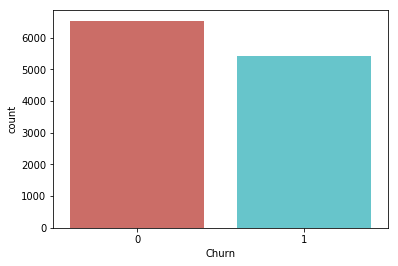

<Figure size 432x288 with 0 Axes>

In [70]:
#Display the distribution of the target variable - 0 = Non Churner - 1 = Churner
sns.countplot(x='Churn', data = final_data, palette = 'hls')
plt.show()
plt.savefig('count_plot')

# Features selection

In [71]:
label=final_data['Churn']
label.value_counts()

0    6537
1    5410
Name: Churn, dtype: int64

In [72]:
data_features=final_data[final_data.columns.difference(['CustomerKey','BirthDate','OrderDate_max','last_purchase_date','cuttoff_date'
                                                    ,'DateFirstPurchase','Churn'])]

In [73]:
data_features.head()

,CommuteDistance_0,CommuteDistance_1,CommuteDistance_2,CommuteDistance_3,EnglishEducation_0,EnglishEducation_1,EnglishEducation_2,EnglishEducation_3,EnglishOccupation_0,EnglishOccupation_1,...,SalesAmount_max,SalesAmount_mean,SalesAmount_median,SalesAmount_min,SalesAmount_sum,Television Advertisement,TotalChildren,YearlyIncome,age,tenure_month
0,0,0,0,1,0,0,0,1,0,0,...,3399.99,1031.123750,44.490,4.99,8248.99,0.0,2,90000.0,41,27
1,0,0,1,1,0,0,0,1,0,0,...,3399.99,2028.510000,2339.530,34.99,8114.04,0.0,3,60000.0,42,25
2,0,1,0,0,0,0,0,1,0,0,...,3399.99,904.365556,9.990,2.29,8139.29,0.0,0,70000.0,39,28
3,0,0,0,1,0,0,0,1,0,0,...,3399.99,1366.001667,1177.490,21.98,8196.01,0.0,5,80000.0,33,27
4,0,1,0,0,0,0,0,1,0,0,...,3374.99,1353.555000,1177.495,2.29,8121.33,0.0,0,70000.0,36,28


# Univariate feature selection

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [75]:
#apply SelectKBest to extract top 10 features
bestFeatures=SelectKBest(score_func=chi2,k=10)
fit=bestFeatures.fit(data_features,label)

In [76]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(data_features.columns)

In [77]:
#connect two dataframe
FeatureScores=pd.concat([dfcolumns,dfscores,] ,axis=1)
FeatureScores.columns= ['Specs','Score']  #naming the dataframe columns


In [79]:
#12 best features
features_chi=FeatureScores.nlargest(12,'Score')
features_chi

,Specs,Score
34,SalesAmount_min,954235.282644
38,YearlyIncome,375433.709772
33,SalesAmount_median,345740.370807
32,SalesAmount_mean,234786.369278
31,SalesAmount_max,46289.053603
35,SalesAmount_sum,22720.409559
40,tenure_month,5238.102822
26,OrderQuantity_sum,647.916068
29,Quality,141.936013
16,Manufacturer,116.719449


In [80]:
final_feature_chi=['SalesAmount_min','YearlyIncome','SalesAmount_median','SalesAmount_mean','SalesAmount_max','SalesAmount_sum','tenure_month','OrderQuantity_sum','Quality','Manufacturer','NumberChildrenAtHome','Television  Advertisement'] 

In [81]:
chi_features=data_features[final_feature_chi]

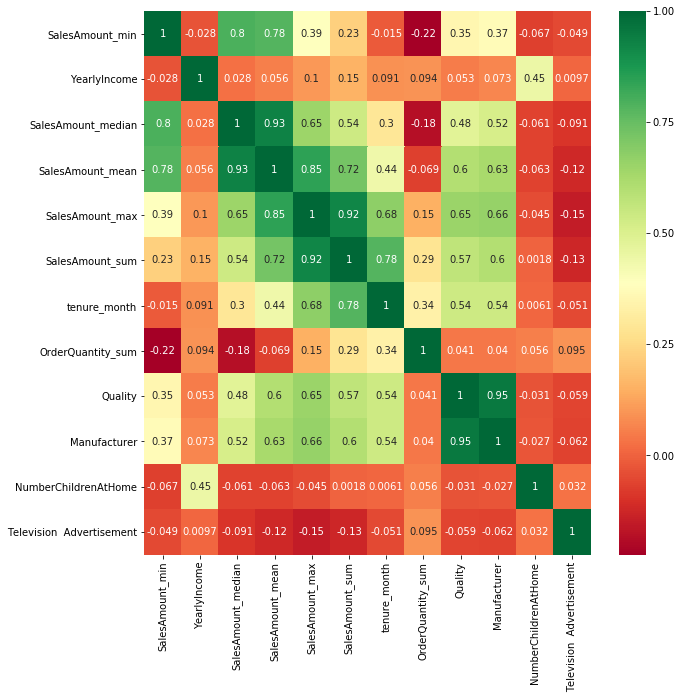

In [82]:
#get correlations of each features in chi dataset
corrmat = chi_features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(chi_features[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [83]:
# removeing highly correlated (more then 70%) features
final_chi_features=chi_features[chi_features.columns.difference(['SalesAmount_max','SalesAmount_median','Manufacturer','SalesAmount_sum','SalesAmount_min'])]
    
    

In [84]:
final_chi_features.head()

,NumberChildrenAtHome,OrderQuantity_sum,Quality,SalesAmount_mean,Television Advertisement,YearlyIncome,tenure_month
0,0,8,0.0,1031.123750,0.0,90000.0,27
1,3,4,0.0,2028.510000,0.0,60000.0,25
2,0,9,0.0,904.365556,0.0,70000.0,28
3,5,6,0.0,1366.001667,0.0,80000.0,27
4,0,6,0.0,1353.555000,0.0,70000.0,28


# Features Importances

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(data_features,label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

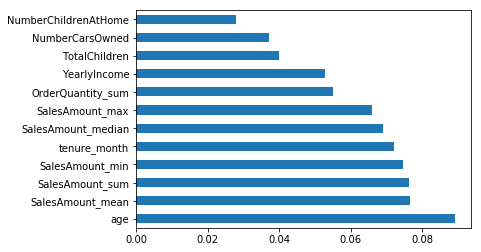

In [86]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data_features.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [87]:
feat_importances=feat_importances.nlargest(12)
feat_importances

age                     0.089112
SalesAmount_mean        0.076407
SalesAmount_sum         0.076286
SalesAmount_min         0.074662
tenure_month            0.072073
SalesAmount_median      0.069062
SalesAmount_max         0.065990
OrderQuantity_sum       0.054918
YearlyIncome            0.052720
TotalChildren           0.039870
NumberCarsOwned         0.037189
NumberChildrenAtHome    0.028021
dtype: float64

In [88]:
features_importances_=['age','SalesAmount_sum','tenure_month','YearlyIncome','SalesAmount_median','SalesAmount_mean','SalesAmount_max','OrderQuantity_sum','TotalChildren','NumberCarsOwned','NumberChildrenAtHome']

In [89]:
features_importance=data_features[features_importances_]

In [90]:
features_importance.head()

,age,SalesAmount_sum,tenure_month,YearlyIncome,SalesAmount_median,SalesAmount_mean,SalesAmount_max,OrderQuantity_sum,TotalChildren,NumberCarsOwned,NumberChildrenAtHome
0,41,8248.99,27,90000.0,44.490,1031.123750,3399.99,8,2,0,0
1,42,8114.04,25,60000.0,2339.530,2028.510000,3399.99,4,3,1,3
2,39,8139.29,28,70000.0,9.990,904.365556,3399.99,9,0,1,0
3,33,8196.01,27,80000.0,1177.490,1366.001667,3399.99,6,5,4,5
4,36,8121.33,28,70000.0,1177.495,1353.555000,3374.99,6,0,1,0


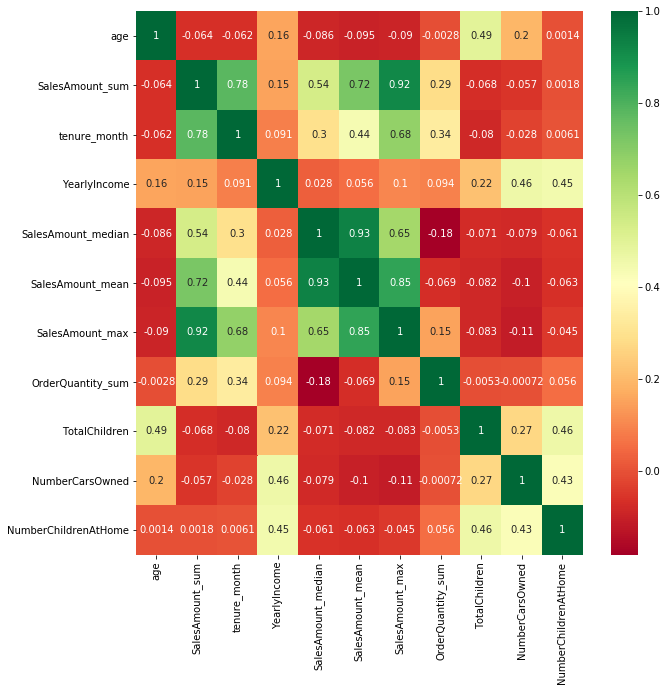

In [91]:
#get correlations of each features in features_importance dataset
corrmat = features_importance.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(features_importance[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [92]:
# removeing highly correlated (more then 70%) features
final_features_importances=features_importance[features_importance.columns.difference(['SalesAmount_max','SalesAmount_sum','SalesAmount_median'])]

In [93]:
final_features_importances.head()

,NumberCarsOwned,NumberChildrenAtHome,OrderQuantity_sum,SalesAmount_mean,TotalChildren,YearlyIncome,age,tenure_month
0,0,0,8,1031.123750,2,90000.0,41,27
1,1,3,4,2028.510000,3,60000.0,42,25
2,1,0,9,904.365556,0,70000.0,39,28
3,4,5,6,1366.001667,5,80000.0,33,27
4,1,0,6,1353.555000,0,70000.0,36,28


# vote based Approch

# WOE & IV

In [94]:
#IMPORT Packages
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [95]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [96]:
final_iv, IV = data_vars(data_features,final_data.Churn)

In [97]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV
26,OrderQuantity_sum,0.142548
40,tenure_month,0.142208
29,Quality,0.053439
16,Manufacturer,0.044126
28,Price,0.038282
34,SalesAmount_min,0.025265
36,Television Advertisement,0.012032
38,YearlyIncome,0.009886
27,Other,0.006695
33,SalesAmount_median,0.005853


# variable importance useing Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(data_features,label)

preds = clf.predict(data_features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,label)
print(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9809994140788483


In [99]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=data_features.columns)

In [100]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
39,age,0.104379
35,SalesAmount_sum,0.098320
32,SalesAmount_mean,0.094909
40,tenure_month,0.082207
33,SalesAmount_median,0.074563
38,YearlyIncome,0.061803
31,SalesAmount_max,0.059020
34,SalesAmount_min,0.054046
26,OrderQuantity_sum,0.039089
37,TotalChildren,0.036845


# Recursive feature Elimination

In [101]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(data_features, label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [102]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=data_features.columns)
Selected = Selected.reset_index()

In [103]:
Selected[Selected['RFE'] == True]

,index,RFE
1,CommuteDistance_1,True
5,EnglishEducation_1,True
12,Gender_0,True
13,Gender_1,True
14,HouseOwnerFlag_0,True
15,HouseOwnerFlag_1,True
16,Manufacturer,True
17,MaritalStatus_0,True
21,On Promotion,True
22,OrderQuantity_max,True


# variable importances useing Extratrees classifier

In [104]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_features, label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [105]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=data_features.columns)

In [106]:
FI = FI.reset_index()

In [107]:
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
39,age,0.089533
40,tenure_month,0.080314
35,SalesAmount_sum,0.076447
32,SalesAmount_mean,0.075162
33,SalesAmount_median,0.071710
31,SalesAmount_max,0.064518
34,SalesAmount_min,0.063458
38,YearlyIncome,0.052208
26,OrderQuantity_sum,0.048512
37,TotalChildren,0.041179


# chi square

In [108]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(data_features.abs(), label)

In [109]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=data_features.columns)

In [110]:
chi_sq = chi_sq.reset_index()

In [111]:
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
34,SalesAmount_min,954235.28
38,YearlyIncome,375433.71
33,SalesAmount_median,345740.37
32,SalesAmount_mean,234786.37
31,SalesAmount_max,46289.05
35,SalesAmount_sum,22720.41
40,tenure_month,5238.10
26,OrderQuantity_sum,647.92
29,Quality,141.94
16,Manufacturer,116.72


# L1 features selection

In [112]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(data_features, label)
model = SelectFromModel(lsvc,prefit=True)

In [113]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=data_features.columns)
l1 = l1.reset_index()

In [114]:
l1[l1['L1'] == True]

,index,L1
3,CommuteDistance_3,True
5,EnglishEducation_1,True
10,EnglishOccupation_2,True
17,MaritalStatus_0,True
19,NumberCarsOwned,True
20,NumberChildrenAtHome,True
22,OrderQuantity_max,True
23,OrderQuantity_mean,True
24,OrderQuantity_median,True
25,OrderQuantity_min,True


# Combine all together

In [115]:
from functools import reduce
dfs = [IV, VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right, on ='index'), dfs)

# vote each variable

In [116]:
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [117]:
score_table['final_score'] = score_table.sum(axis=1)

In [118]:
score_table.sort_values('final_score',ascending=0)

,index,IV,RF,Extratrees,Chi_Square,RFE,L1,final_score
40,tenure_month,1,1,1,0,1,1,5
32,SalesAmount_mean,0,1,1,1,0,1,4
29,Quality,1,0,0,0,1,1,3
39,age,0,1,1,0,0,1,3
26,OrderQuantity_sum,1,0,0,0,1,1,3
35,SalesAmount_sum,0,1,1,0,0,1,3
33,SalesAmount_median,0,1,1,1,0,0,3
28,Price,1,0,0,0,1,1,3
24,OrderQuantity_median,0,0,0,0,1,1,2
25,OrderQuantity_min,0,0,0,0,1,1,2


# Multicolineraity

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [121]:
features = data_features[list(score_table[score_table['final_score'] >= 2]['index'])]

In [122]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [123]:
list(vif['Features'])

['EnglishEducation_1',
 'MaritalStatus_0',
 'OrderQuantity_max',
 'OrderQuantity_mean',
 'OrderQuantity_median',
 'OrderQuantity_min',
 'OrderQuantity_sum',
 'Price',
 'Quality',
 'SalesAmount_max',
 'SalesAmount_median',
 'SalesAmount_min',
 'Television  Advertisement',
 'age',
 'tenure_month']

In [124]:
v_features=data_features[list(vif['Features'])]

In [125]:
v_features.head()

,EnglishEducation_1,MaritalStatus_0,OrderQuantity_max,OrderQuantity_mean,OrderQuantity_median,OrderQuantity_min,OrderQuantity_sum,Price,Quality,SalesAmount_max,SalesAmount_median,SalesAmount_min,Television Advertisement,age,tenure_month
0,0,0,1,1,1,1,8,1.00,0.00,3399.99,44.49,4.99,0.00,41,27
1,0,0,1,1,1,1,4,0.00,0.00,3399.99,2339.53,34.99,0.00,42,25
2,0,1,1,1,1,1,9,1.00,0.00,3399.99,9.99,2.29,0.00,39,28
3,0,1,1,1,1,1,6,1.00,0.00,3399.99,1177.49,21.98,0.00,33,27
4,0,1,1,1,1,1,6,1.00,0.00,3374.99,1177.49,2.29,0.00,36,28


# cross validation with chi

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn import model_selection
#from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [127]:
models = []
models.append(('LR', LogisticRegression())) # no correlation please /independent vars               # costly
models.append(('LDA', LinearDiscriminantAnalysis())) # no correlation please /independent vars      #costly
models.append(('KNN', KNeighborsClassifier())) #K Neighbours
models.append(('CART', DecisionTreeClassifier())) # Decision Tree
models.append(('NB', GaussianNB())) # Naive Bayes
models.append(('SVM', SVC())) # Support Vector Machine SVM / no correlation please /independent vars   #costly
models.append(('RF', RandomForestClassifier())) # anything goes

In [128]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB'

In [129]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    #kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, final_chi_features, label)
    results.append(cv_results)
    names.append(name)
    print(name, ":", cv_results.mean(), cv_results.std())
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You sho

LR : 0.5798986055712503 0.050901673930265595
LDA : 0.586929995760065 0.04895524033183939


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNN : 0.5336926244256153 0.020207672275361636
CART : 0.5558721670733634 0.005636818334694632


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


NB : 0.556545357111437 0.036571020653971234


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

SVM : 0.5163652790389626 0.018758265697126856


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF : 0.5582177292165738 0.02161221363502537


# cross validation with features importances

In [130]:
results = []
names = []
for name, model in models:
    #kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, final_features_importances, label)
    results.append(cv_results)
    names.append(name)
    print(name, ":", cv_results.mean(), cv_results.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You sho

LR : 0.577387998272753 0.05381671867321573
LDA : 0.5768854438663836 0.05287502002732328


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNN : 0.5288376319263114 0.01711939251205326


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CART : 0.5476704757987226 0.013583110424817503
NB : 0.5567964241463352 0.03498163941164794


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

SVM : 0.5257395832505796 0.011358175269480877


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF : 0.5522754731213887 0.025820834575302844


# cross validation with vote based approch

In [131]:
results = []
names = []
for name, model in models:
    #kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, v_features, label)
    results.append(cv_results)
    names.append(name)
    print(name, ":", cv_results.mean(), cv_results.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR : 0.5972247109650133 0.041172261583771255


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.


LDA : 0.5913660598141465 0.0444570275769936
KNN : 0.5376262391574707 0.023225101485556905
CART

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 : 0.5695160610394276 0.013013001771754332
NB : 0.5758786116736966 0.03104972308286355


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

SVM : 0.5258243020868155 0.016227029183876848


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF : 0.5588038465336042 0.02252579965433974


In [132]:
#since we got best cross validation score from vote approch method, hence we stlected v_features.

# Model

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import metrics

In [134]:
# Split-out validation dataset
X=v_features
Y=label
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# Logestic Regression 

In [135]:
LG = LogisticRegression()
LG.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
# here we apply the model on the testing test we separated earlier on
predictions = LG.predict(X_test) # predict is testing

print('Accuracy Score')
print(accuracy_score(Y_test, predictions),'\n')

print('Precision Score')
print(precision_score(Y_test, predictions,average = None),'\n')

print('Confusion Matrix')
array = confusion_matrix( predictions, Y_test)
columns = ['Charner','Non Charner']
print(pd.DataFrame(array,columns = columns, index = columns),'\n')
#f1 score = (precision*recall)/(precision+recall)
print('Classification Report')
print(classification_report(Y_test, predictions),'\n') 

Accuracy Score
0.597071129707113 

Precision Score
[0.59453032 0.60310734] 

Confusion Matrix
             Charner  Non Charner
Charner         1000          682
Non Charner      281          427 

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.78      0.67      1281
           1       0.60      0.39      0.47      1109

   micro avg       0.60      0.60      0.60      2390
   macro avg       0.60      0.58      0.57      2390
weighted avg       0.60      0.60      0.58      2390
 



# Random Forest Classifer

In [137]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
predictions = RF.predict(X_test) # predict is testing

print('Accuracy Score')
print(accuracy_score(Y_test, predictions),'\n')

print('Precision Score')
print(precision_score(Y_test, predictions,average = None),'\n')

print('Confusion Matrix')
array = confusion_matrix( predictions, Y_test)
columns = ['Charner','Non Charner']
print(pd.DataFrame(array,columns = columns, index = columns),'\n')
#f1 score = (precision*recall)/(precision+recall)
print('Classification Report')
print(classification_report(Y_test, predictions),'\n')

Accuracy Score
0.6359832635983264 

Precision Score
[0.64143152 0.62753469] 

Confusion Matrix
             Charner  Non Charner
Charner          932          521
Non Charner      349          588 

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1281
           1       0.63      0.53      0.57      1109

   micro avg       0.64      0.64      0.64      2390
   macro avg       0.63      0.63      0.63      2390
weighted avg       0.63      0.64      0.63      2390
 



# Nural Network

In [139]:
from sklearn.neural_network import MLPClassifier
NE = MLPClassifier()
NE.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [140]:
predictions = NE.predict(X_test) # predict is testing

print('Accuracy Score')
print(accuracy_score(Y_test, predictions),'\n')

print('Precision Score')
print(precision_score(Y_test, predictions,average = None),'\n')

print('Confusion Matrix')
array = confusion_matrix( predictions, Y_test)
columns = ['Charner','Non Charner']
print(pd.DataFrame(array,columns = columns, index = columns),'\n')
#f1 score = (precision*recall)/(precision+recall)
print('Classification Report')
print(classification_report(Y_test, predictions),'\n')

Accuracy Score
0.599163179916318 

Precision Score
[0.60332694 0.59129383] 

Confusion Matrix
             Charner  Non Charner
Charner          943          620
Non Charner      338          489 

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1281
           1       0.59      0.44      0.51      1109

   micro avg       0.60      0.60      0.60      2390
   macro avg       0.60      0.59      0.58      2390
weighted avg       0.60      0.60      0.59      2390
 



# Naive Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB 
NB = GaussianNB()
NB.fit(X_train,Y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [142]:
predictions = NB.predict(X_test) # predict is testing

print('Accuracy Score')
print(accuracy_score(Y_test, predictions),'\n')

print('Precision Score')
print(precision_score(Y_test, predictions,average = None),'\n')

print('Confusion Matrix')
array = confusion_matrix( predictions, Y_test)
columns = ['Charner','Non Charner']
print(pd.DataFrame(array,columns = columns, index = columns),'\n')
#f1 score = (precision*recall)/(precision+recall)
print('Classification Report')
print(classification_report(Y_test, predictions),'\n')

Accuracy Score
0.597489539748954 

Precision Score
[0.58217414 0.6636971 ] 

Confusion Matrix
             Charner  Non Charner
Charner         1130          811
Non Charner      151          298 

Classification Report
              precision    recall  f1-score   support

           0       0.58      0.88      0.70      1281
           1       0.66      0.27      0.38      1109

   micro avg       0.60      0.60      0.60      2390
   macro avg       0.62      0.58      0.54      2390
weighted avg       0.62      0.60      0.55      2390
 



# Gradient Boosting

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [144]:
predictions = GB.predict(X_test) # predict is testing

print('Accuracy Score')
print(accuracy_score(Y_test, predictions),'\n')

print('Precision Score')
print(precision_score(Y_test, predictions,average = None),'\n')

print('Confusion Matrix')
array = confusion_matrix( predictions, Y_test)
columns = ['Charner','Non Charner']
print(pd.DataFrame(array,columns = columns, index = columns),'\n')
#f1 score = (precision*recall)/(precision+recall)
print('Classification Report')
print(classification_report(Y_test, predictions),'\n')

Accuracy Score
0.6330543933054393 

Precision Score
[0.61785298 0.67159763] 

Confusion Matrix
             Charner  Non Charner
Charner         1059          655
Non Charner      222          454 

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.83      0.71      1281
           1       0.67      0.41      0.51      1109

   micro avg       0.63      0.63      0.63      2390
   macro avg       0.64      0.62      0.61      2390
weighted avg       0.64      0.63      0.62      2390
 



# Final Model and Model Performance

In [145]:
# we choose Random Forest classifer is our final model

In [146]:
#ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model --
# --using different probability thresholds.
#Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value -- 
# --for a predictive model using different probability thresholds.
#ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves --
#--are appropriate for imbalanced datasets

In [147]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

#from sklearn import metrics
preds = RF.predict_proba(X_test)[:,1]
#predictions = RF.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(np.array(Y_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

AUC: 0.684


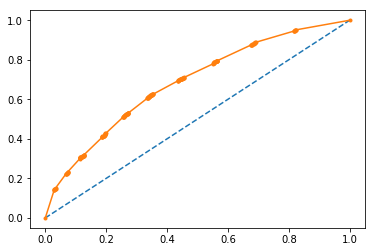

In [148]:

# roc curve and auc on imbalanced dataset

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9,0.09], random_state=1)
# split into train/test sets
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
#model = KNeighborsClassifier(n_neighbors=3)
#model.fit(trainX, trainy)
# predict probabilities
# model.predict_proba(testX)
probs = RF.predict_proba(X_test)[:,1]
# keep probabilities for the positive outcome only
#probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


In [150]:
import modelplotpy as mp

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# define target vector y
#y = bank.y
# define feature matrix X
#X = bank.drop('y', axis = 1)
X=v_features
Y=label

# Create the necessary datasets to build models
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2018)

# Instantiate a few classification models
clf_rf = RandomForestClassifier().fit(X_train, Y_train)
clf_mult = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg').fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [152]:
obj = mp.modelplotpy(feature_data = [X_train, X_test]
                     , label_data = [Y_train, Y_test]
                     , dataset_labels = ['train data', 'test data']
                     , models = [clf_rf, clf_mult]
                     , model_labels = ['random forest', 'multinomial logit']
                     )


In [153]:
# transform data generated with prepare_scores_and_deciles into aggregated data for chosen plotting 
ps = obj.plotting_scope(select_model_label = ['random forest'], select_dataset_label = ['test data'])

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U11') dtype('<U11') dtype('<U11')

# Decile plots and KS statistics

In [ ]:
from collections import OrderedDict
import pandas as pd
import sys
%matplotlib inline
    
def plot_pandas_style(styler):
    from IPython.core.display import HTML
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

def highlight_max(s,color='yellow'):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def decile_labels(agg1,label,color='skyblue'):
    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('TARGET',0),('NONTARGET',0),('PCT_TAR',0),('CUM_TAR',0),('CUM_NONTAR',0),('DIST_TAR',0),('DIST_NONTAR',0),('SPREAD',0))),index=[0])
    agg1 = agg1.append(agg_dummy).sort_index()
    agg1.index.name = label
    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['SPREAD'])
    agg1.bar(subset=['TARGET'], color='{}'.format(color))
    agg1.bar(subset=['TOTAL'], color='{}'.format(color))
    agg1.bar(subset=['PCT_TAR'], color='{}'.format(color))
    return(agg1)

def deciling(data,decile_by,target,nontarget):
    inputs = list(decile_by)
    inputs.extend((target,nontarget))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['TOTAL'] = grouped.sum()[nontarget] + grouped.sum()[target]
    agg1['TARGET'] = grouped.sum()[target]
    agg1['NONTARGET'] = grouped.sum()[nontarget]
    agg1['PCT_TAR'] = grouped.mean()[target]*100
    agg1['CUM_TAR'] = grouped.sum()[target].cumsum()
    agg1['CUM_NONTAR'] = grouped.sum()[nontarget].cumsum()
    agg1['DIST_TAR'] = agg1['CUM_TAR']/agg1['TARGET'].sum()*100
    agg1['DIST_NONTAR'] = agg1['CUM_NONTAR']/agg1['NONTARGET'].sum()*100
    agg1['SPREAD'] = (agg1['DIST_TAR'] - agg1['DIST_NONTAR'])
    agg1 = decile_labels(agg1,'DECILE',color='skyblue')
    return(plot_pandas_style(agg1))

In [ ]:
def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

In [ ]:
scores_test = scoring(X_test,RF,Y_test)
scores_train = scoring(X_train,RF,Y_train)

In [ ]:
deciling(scores_train,['DECILE'],'TARGET','NONTARGET')

In [ ]:
deciling(scores_test,['DECILE'],'TARGET','NONTARGET')